🧵 1. Load dan Preprocessing Data Fashion MNIST

In [8]:
from keras.datasets import fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalisasi dan reshape
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Keras menerima input 2D, tidak perlu flatten manual karena pakai Flatten layer

🏗️ 2. Build Model (He init, BatchNorm, Dropout)

In [9]:
from keras import models, layers, initializers

model = models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.BatchNormalization(),

    layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


⚙️ 3. Compile Model (optimizer = Adam)

In [10]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

🧩 4. Callbacks: EarlyStopping, ModelCheckpoint, LR Scheduler

In [11]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

# Stop lebih awal jika tidak improve dalam 10 epoch
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

# Simpan model terbaik
checkpoint_cb = ModelCheckpoint("best_model.keras", save_best_only=True)

# Learning rate schedule: mulai 0.01 dan turun bertahap
def lr_schedule(epoch):
    return 0.01 * 0.1**(epoch / 20)

lr_scheduler_cb = LearningRateScheduler(lr_schedule)

🧪 5. Training Model dengan Callbacks

In [12]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb, checkpoint_cb, lr_scheduler_cb]
)

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7693 - loss: 0.6530 - val_accuracy: 0.8646 - val_loss: 0.3795 - learning_rate: 0.0100
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8414 - loss: 0.4362 - val_accuracy: 0.8716 - val_loss: 0.3405 - learning_rate: 0.0089
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8538 - loss: 0.4013 - val_accuracy: 0.8798 - val_loss: 0.3495 - learning_rate: 0.0079
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8625 - loss: 0.3791 - val_accuracy: 0.8734 - val_loss: 0.3377 - learning_rate: 0.0071
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8688 - loss: 0.3568 - val_accuracy: 0.8810 - val_loss: 0.3200 - learning_rate: 0.0063
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8786 - loss: 0.3327 - val_accuracy: 0.8874 - val_loss: 0.3156 - learning_rate: 0.0056
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8807 - 

📈 6. Visualisasi Learning Curve

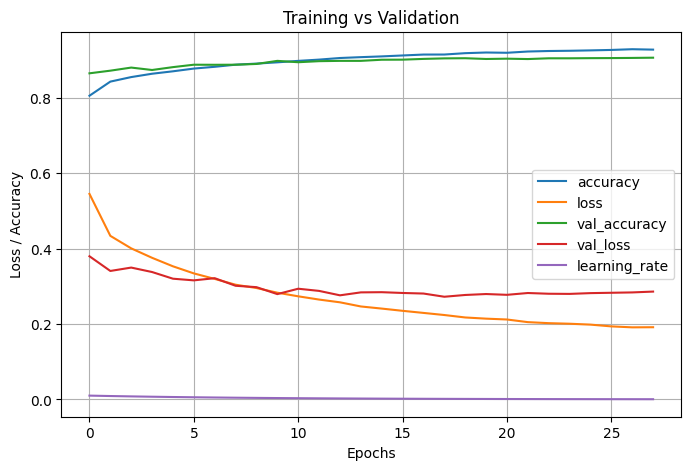

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.title("Training vs Validation")
plt.show()

📊 7. Evaluasi Model Terbaik

In [14]:
# Muat kembali model terbaik
from keras.models import load_model
best_model = load_model("best_model.keras")

test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("Akurasi pada data test:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8980 - loss: 0.3071
Akurasi pada data test: 0.899399995803833


🔍 8. Prediksi (Opsional)

In [15]:
import numpy as np

X_sample = X_test[:5]
y_proba = best_model.predict(X_sample)
y_pred = np.argmax(y_proba, axis=1)

print("Prediksi label:", y_pred)
print("Label asli    :", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Prediksi label: [9 2 1 1 6]
Label asli    : [9 2 1 1 6]


## ✅ Catatan:

* Kombinasi He initialization, BatchNorm, Dropout, Adam, dan EarlyStopping adalah **praktik standar** saat ini untuk jaringan saraf dalam.
* **BatchNormalization** sering kali meningkatkan stabilitas dan mempercepat konvergensi.
* **ModelCheckpoint** dan **EarlyStopping** sangat penting untuk produksi.
